In [615]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# Import Library

In [616]:
!pip install split-folders
!pip install tensorflow
!pip install keras_tuner
!pip install tensorflowjs

In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

import pickle
import tensorflowjs as tfjs

In [618]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [619]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"muhammadrizkyfajar","key":"c1a041284a4cdab130e20ca57f837ef8"}'}

# Setup Folder dan Split Dataset Manual

In [620]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 74 May 29 14:46 kaggle.json


In [621]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset
!unzip diabetes-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  diabetes-prediction-dataset.zip
replace diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes_prediction_dataset.csv  


In [622]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset
!unzip stroke-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: healthcare-dataset-stroke-data.csv  


In [623]:
!kaggle datasets download -d alexteboul/heart-disease-health-indicators-dataset
!unzip heart-disease-health-indicators-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset
License(s): CC0-1.0
heart-disease-health-indicators-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-disease-health-indicators-dataset.zip
replace heart_disease_health_indicators_BRFSS2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart_disease_health_indicators_BRFSS2015.csv  


In [624]:
# Muat setiap dataset
df_heart = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
# df_lung_cancer = pd.read_csv('lung_cancer_prediction_dataset.csv') # Opsional, jika ingin menambahkan kanker paru

print("Dataset berhasil dimuat.")
print(f"Shape Heart Disease: {df_heart.shape}")
print(f"Shape Stroke: {df_stroke.shape}")
print(f"Shape Diabetes: {df_diabetes.shape}")
# print(f"Shape Lung Cancer: {df_lung_cancer.shape}")

Dataset berhasil dimuat.
Shape Heart Disease: (253680, 22)
Shape Stroke: (5110, 12)
Shape Diabetes: (100000, 9)


In [625]:
df_heart

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [626]:
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [627]:
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Eksplorasi Data Awal (EDA) dan Pembersihan

## EDA untuk Heart Disease Dataset

In [628]:
print("\n--- EDA untuk Heart Disease Dataset ---")
print(df_heart.head())
print(df_heart.info())
print("\nMissing Value:\n", df_heart.isnull().sum())
print("\n", df_heart['HeartDiseaseorAttack'].value_counts(normalize=True)) # Distribusi target


--- EDA untuk Heart Disease Dataset ---
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  Ph

In [629]:
kolom_kategorik1 = ['Sex', 'Education', 'Smoker']
for kolom in kolom_kategorik1:
    print(f"Unique values di kolom '{kolom}':")
    print(df_heart[kolom].unique())
    print('-' * 40)

Unique values di kolom 'Sex':
[0. 1.]
----------------------------------------
Unique values di kolom 'Education':
[4. 6. 3. 5. 2. 1.]
----------------------------------------
Unique values di kolom 'Smoker':
[1. 0.]
----------------------------------------


In [630]:
print("\nBanyaknya Data per-Smoker ", df_heart['Smoker'].value_counts(normalize=False)) # Distribusi target


Banyaknya Data per-Smoker  Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64


## EDA untuk Stroke Dataset

In [631]:
print("\n--- EDA untuk Stroke Dataset ---")
print(df_stroke.head())
print("\n", df_stroke.info())
print("\nMissing Value:\n", df_stroke.isnull().sum())
print("\nBanyaknya Data per-Target ", df_stroke['stroke'].value_counts(normalize=False)) # Distribusi target
print("\nDistribusi Target ", df_stroke['stroke'].value_counts(normalize=True)) # Distribusi target


--- EDA untuk Stroke Dataset ---
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.fr

In [632]:
df_stroke_mv = df_stroke[df_stroke['bmi'].isnull()]
print("\nBanyaknya Data MV per-Target ", df_stroke_mv['stroke'].value_counts(normalize=False)) # Distribusi target
print("\nDistribusi Data MV Target ", df_stroke_mv['stroke'].value_counts(normalize=True)) # Distribusi target
df_stroke_mv


Banyaknya Data MV per-Target  stroke
0    161
1     40
Name: count, dtype: int64

Distribusi Data MV Target  stroke
0    0.800995
1    0.199005
Name: proportion, dtype: float64


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [633]:
df_stroke['bmi'] = df_stroke.groupby(['stroke','gender', 'hypertension', 'heart_disease', 'smoking_status'])['bmi'].transform(
    lambda x: x.fillna(x.median()))

print(df_stroke.head())
print("\nMissing Value:\n", df_stroke.isnull().sum())
print("\nBanyaknya Data per-Target ", df_stroke['stroke'].value_counts(normalize=False)) # Distribusi target
print("\nDistribusi Target ", df_stroke['stroke'].value_counts(normalize=True)) # Distribusi target

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  29.9     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Missing Value:
 id                   0
gender          

In [634]:
kolom_kategorik2 = df_stroke.select_dtypes(include=['object', 'category']).columns
for kolom in kolom_kategorik2:
    print(f"Unique values di kolom '{kolom}':")
    print(df_stroke[kolom].unique())
    print('-' * 40)

Unique values di kolom 'gender':
['Male' 'Female' 'Other']
----------------------------------------
Unique values di kolom 'ever_married':
['Yes' 'No']
----------------------------------------
Unique values di kolom 'work_type':
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
----------------------------------------
Unique values di kolom 'Residence_type':
['Urban' 'Rural']
----------------------------------------
Unique values di kolom 'smoking_status':
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
----------------------------------------


In [635]:
df_stroke_go = df_stroke[df_stroke['gender'] == 'Other']
print("\nBanyaknya Data gender = other per-Target ", df_stroke_go['stroke'].value_counts(normalize=False)) # Distribusi target
df_stroke_go


Banyaknya Data gender = other per-Target  stroke
0    1
Name: count, dtype: int64


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [636]:
df_stroke = df_stroke[df_stroke['gender'] != 'Other']
kolom_kategorik2 = df_stroke.select_dtypes(include=['object', 'category']).columns
for kolom in kolom_kategorik2:
    print(f"Unique values di kolom '{kolom}':")
    print(df_stroke[kolom].unique())
    print('-' * 40)

Unique values di kolom 'gender':
['Male' 'Female']
----------------------------------------
Unique values di kolom 'ever_married':
['Yes' 'No']
----------------------------------------
Unique values di kolom 'work_type':
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
----------------------------------------
Unique values di kolom 'Residence_type':
['Urban' 'Rural']
----------------------------------------
Unique values di kolom 'smoking_status':
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
----------------------------------------


## EDA untuk Diabetes Dataset

In [637]:
print("\n--- EDA untuk Diabetes Dataset ---")
print(df_diabetes.head())
print(df_diabetes.info())
print("\nMissing Value:\n", df_diabetes.isnull().sum())
print("\nBanyaknya Data MV per-Target ", df_diabetes['diabetes'].value_counts(normalize=False)) # Distribusi target
print("\nDistribusi Target ", df_diabetes['diabetes'].value_counts(normalize=True)) # Distribusi target


--- EDA untuk Diabetes Dataset ---
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-n

In [638]:
kolom_kategorik3 = df_diabetes.select_dtypes(include=['object', 'category']).columns
for kolom in kolom_kategorik3:
    print(f"Unique values di kolom '{kolom}':")
    print(df_diabetes[kolom].unique())
    print('-' * 40)

Unique values di kolom 'gender':
['Female' 'Male' 'Other']
----------------------------------------
Unique values di kolom 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']
----------------------------------------


In [639]:
df_diabetes_go = df_diabetes[df_diabetes['gender'] == 'Other']
print("\nBanyaknya Data gender = other per-Target ", df_diabetes_go['diabetes'].value_counts(normalize=False)) # Distribusi target
df_diabetes_go


Banyaknya Data gender = other per-Target  diabetes
0    18
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


In [640]:
df_diabetes = df_diabetes[df_diabetes['gender'] != 'Other']
kolom_kategorik3 = df_diabetes.select_dtypes(include=['object', 'category']).columns
for kolom in kolom_kategorik3:
    print(f"Unique values di kolom '{kolom}':")
    print(df_diabetes[kolom].unique())
    print('-' * 40)

Unique values di kolom 'gender':
['Female' 'Male']
----------------------------------------
Unique values di kolom 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']
----------------------------------------


## Visualisasi Data

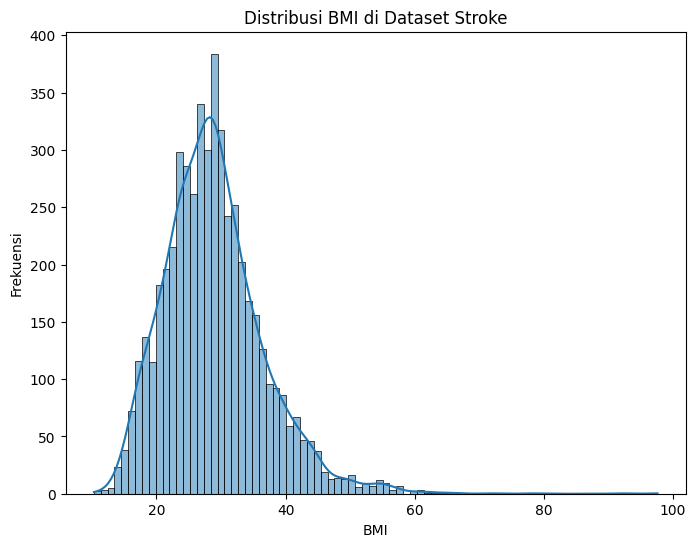

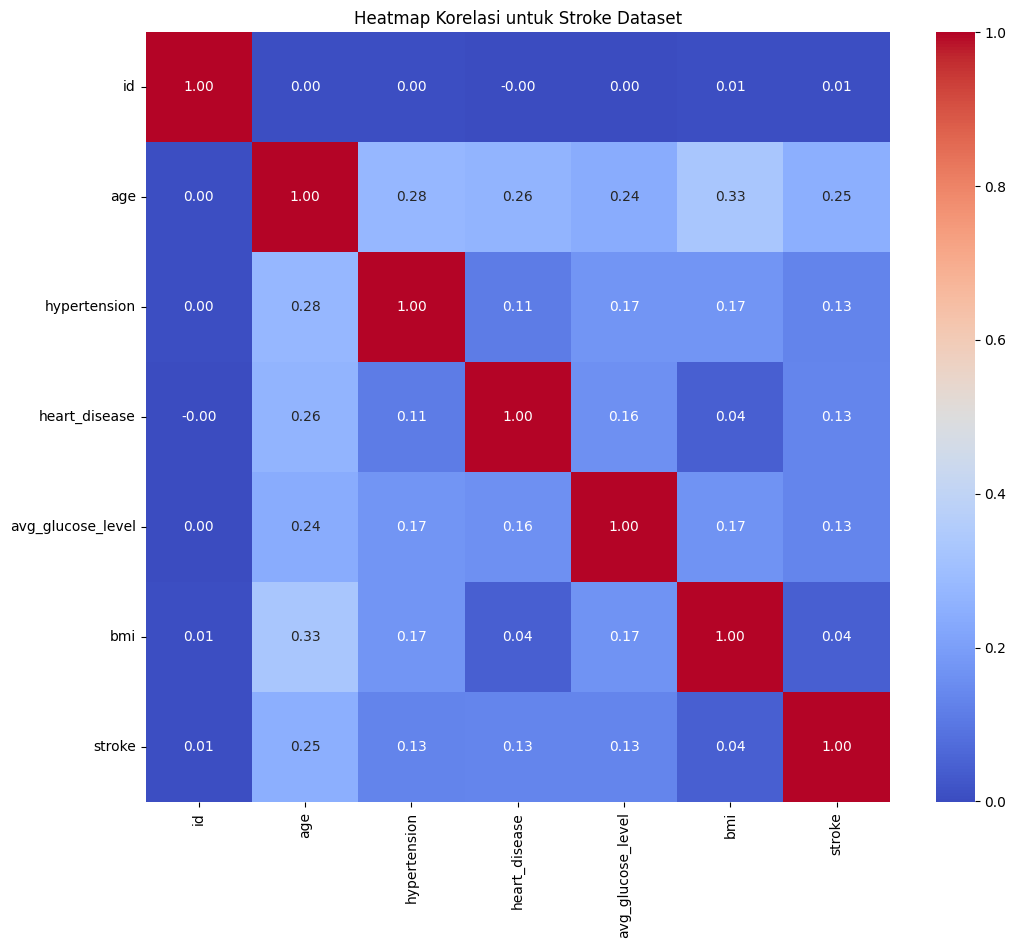

In [641]:
# Contoh visualisasi distribusi IMT dari dataset stroke
plt.figure(figsize=(8, 6))
sns.histplot(df_stroke['bmi'].dropna(), kde=True)
plt.title('Distribusi BMI di Dataset Stroke')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df_stroke.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi untuk Stroke Dataset')
plt.show()

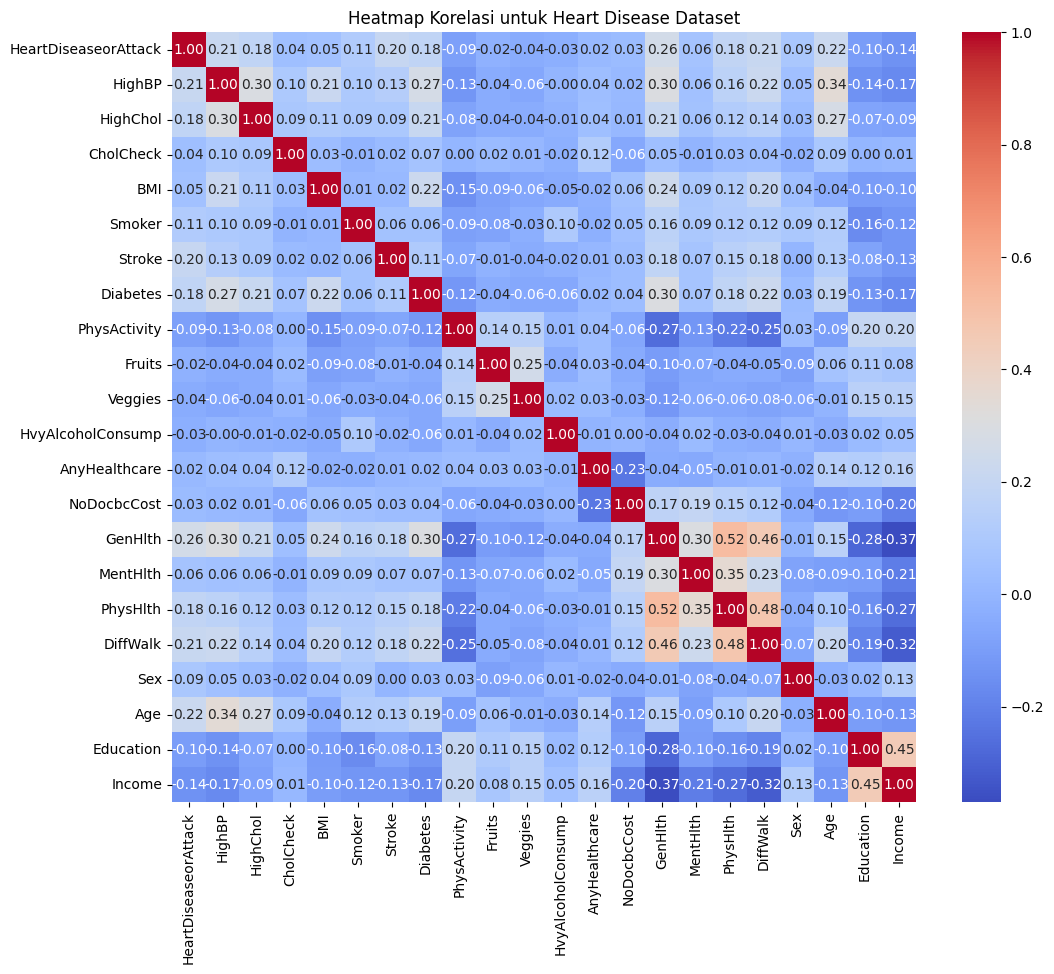

In [642]:
# Visualisasi korelasi di dataset jantung
plt.figure(figsize=(12, 10))
sns.heatmap(df_heart.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi untuk Heart Disease Dataset')
plt.show()

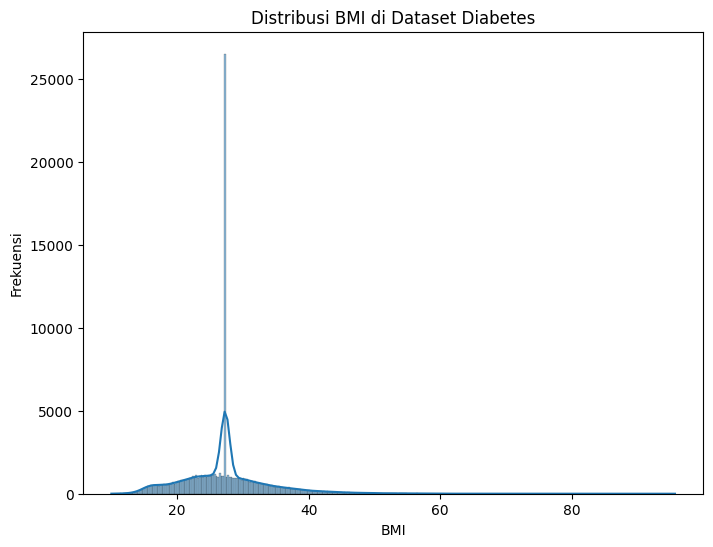

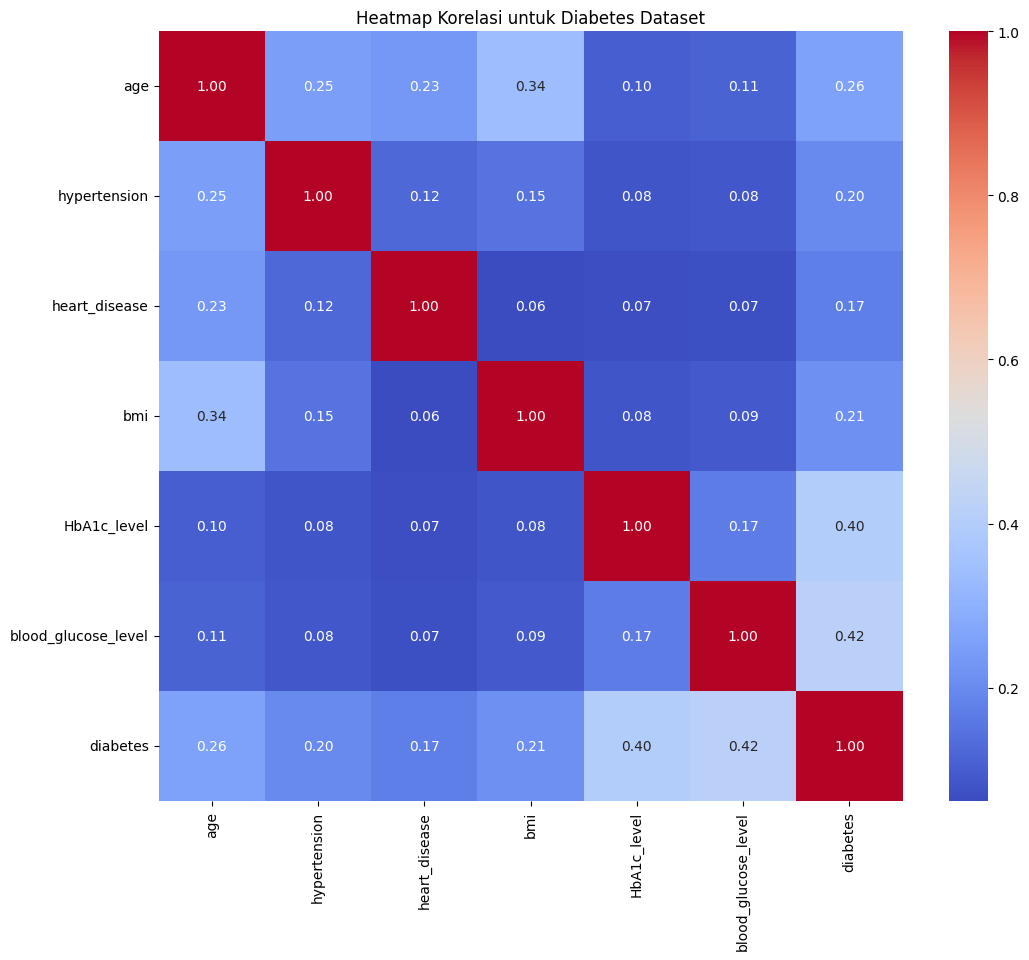

In [643]:
# Contoh visualisasi distribusi IMT dari dataset dabetes
plt.figure(figsize=(8, 6))
sns.histplot(df_diabetes['bmi'].dropna(), kde=True)
plt.title('Distribusi BMI di Dataset Diabetes')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df_diabetes.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi untuk Diabetes Dataset')
plt.show()

# Harmonisasi dan Penggabungan Dataset

In [644]:
# Rename kolom target untuk kejelasan dan konsistensi
df_heart = df_heart.rename(columns={'HeartDiseaseorAttack': 'HeartDisease'})
df_stroke = df_stroke.rename(columns={'stroke': 'Stroke'})
df_diabetes = df_diabetes.rename(columns={'diabetes': 'Diabetes'})

In [645]:
# Pilih fitur umum yang akan digunakan dan harmonisasikan nama kolom
# Ini adalah contoh, Anda mungkin perlu menyesuaikannya berdasarkan EDA Anda
common_features = [
    'Age', 'Sex', 'BMI', 'SmokingStatus', 'Hypertension', 'HeartDisease',
    'Glucose'
] # Ini harus diverifikasi lagi dengan kolom asli dari setiap dataset!

# Perbaiki nama kolom yang berbeda antar dataset (contoh)
df_heart = df_heart.rename(columns={
    'Age': 'Age', 'Sex': 'Gender', 'BMI': 'BMI', 'Smoker': 'SmokingStatus',
    'HighBP': 'Hypertension'
})
df_stroke = df_stroke.rename(columns={
    'gender': 'Gender', 'age': 'Age', 'avg_glucose_level': 'Glucose',
    'bmi': 'BMI', 'hypertension': 'Hypertension', 'heart_disease': 'HeartDisease',
    'smoking_status': 'SmokingStatus'
})
df_diabetes = df_diabetes.rename(columns={
    'gender': 'Gender', 'age': 'Age', 'bmi': 'BMI', 'hypertension': 'Hypertension',
    'heart_disease': 'HeartDisease', 'smoking_history': 'SmokingStatus',
    'blood_glucose_level': 'Glucose'
})

In [646]:
df_heart['Diabetes'] = df_heart['Diabetes'].map({0:0, 1:1, 2: 1})
df_stroke['Gender'] = df_stroke['Gender'].map({'Female':0, 'Male':1})
df_diabetes['Gender'] = df_diabetes['Gender'].map({'Female':0, 'Male':1})
df_stroke['SmokingStatus'] = df_stroke['SmokingStatus'].map({'never smoked': 0, 'smokes': 1, 'formerly smoked': 2, 'Unknown': 3})
df_diabetes['SmokingStatus'] = df_diabetes['SmokingStatus'].map({'never': 0, 'current': 1, 'former': 2, 'ever': 2, 'not current': 2, 'No Info': 3})

In [647]:
df_heart

,HeartDisease,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,1,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Imputasi Nilai Glucose Dataset HeartDisease

In [648]:
df_heart['Glucose'] = np.nan

In [649]:
df_heart

,HeartDisease,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Glucose
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,NaN
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,NaN
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,NaN
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,NaN
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,NaN
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,1,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,NaN
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,NaN
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,NaN


In [650]:
df_diabetes

,Gender,Age,Hypertension,HeartDisease,SmokingStatus,BMI,HbA1c_level,Glucose,Diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,3,27.32,6.2,90,0
99996,0,2.0,0,0,3,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [651]:
selected_features = ['Gender', 'Age', 'Hypertension', 'HeartDisease', 'SmokingStatus', 'BMI', 'Diabetes']

# Fitur dan target untuk model
X_train = df_diabetes[selected_features]
y_train = df_diabetes['Glucose']

X_missing = df_heart[selected_features]

In [652]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_missing_scaled = scaler.transform(X_missing)

In [653]:
# Menggunakan Random Forest sebagai contoh
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [654]:
predicted_glucose = model.predict(X_missing_scaled)
# Masukkan prediksi ke df_missing
df_heart.loc[:, 'Glucose'] = predicted_glucose
df_heart['Glucose'] = df_heart['Glucose'].round(0).astype(int)

In [655]:
df_heart

,HeartDisease,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Glucose
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,132
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,141
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,128
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,138
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,144
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,1,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,230
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,139
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,124


## Penggabungan Dataset

In [517]:
#df_stroke.drop(columns=['HeartDisease'], inplace=True)
#df_diabetes.drop(columns=['HeartDisease'], inplace=True)
#df_heart.drop(columns=['Stroke', 'Diabetes'], inplace=True)

In [519]:
# Buat dataframe gabungan dengan semua kolom fitur dan target
all_features = sorted(list(set(df_heart.columns) |
                           set(df_stroke.columns) |
                           set(df_diabetes.columns)))

# Inisialisasi DataFrame kosong dengan semua kolom
combined_df = pd.DataFrame(columns=all_features)

# Fungsi untuk menambahkan baris dari df yang diproses ke combined_df, mengisi NaN untuk kolom yang tidak ada
def add_to_combined(df_src, combined_df_target):
    for col in all_features:
        if col not in df_src.columns:
            df_src[col] = np.nan
    return pd.concat([combined_df_target, df_src[all_features]], ignore_index=True)

combined_df = add_to_combined(df_heart, combined_df)
combined_df = add_to_combined(df_stroke, combined_df)
combined_df = add_to_combined(df_diabetes, combined_df)

print("\nBentuk Dataset Gabungan Setelah Pembersihan dan Penyelarasan:", combined_df.shape)
print("Kolom Dataset Gabungan:", combined_df.columns.tolist())

# Hapus baris di mana semua target adalah NaN
combined_df.dropna(subset=['HeartDisease', 'Stroke', 'Diabetes'], how='all', inplace=True)
print("\nBentuk Dataset Gabungan Setelah Menghapus Baris Tanpa Target:", combined_df.shape)


<ipython-input-519-b73eab0d796d>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([combined_df_target, df_src[all_features]], ignore_index=True)
<ipython-input-519-b73eab0d796d>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([combined_df_target, df_src[all_features]], ignore_index=True)



Bentuk Dataset Gabungan Setelah Pembersihan dan Penyelarasan: (358771, 28)
Kolom Dataset Gabungan: ['Age', 'AnyHealthcare', 'BMI', 'CholCheck', 'Diabetes', 'DiffWalk', 'Education', 'Fruits', 'GenHlth', 'Gender', 'Glucose', 'HbA1c_level', 'HeartDisease', 'HighChol', 'HvyAlcoholConsump', 'Hypertension', 'Income', 'MentHlth', 'NoDocbcCost', 'PhysActivity', 'PhysHlth', 'Residence_type', 'SmokingStatus', 'Stroke', 'Veggies', 'ever_married', 'id', 'work_type']

Bentuk Dataset Gabungan Setelah Menghapus Baris Tanpa Target: (358771, 28)


# Pemisahan Fitur dan Target

In [656]:
# --- 3. Pemisahan Fitur dan Target ---
# Fitur (X) dan Target (Y)
# Target di sini adalah multi-output: penyakit jantung, stroke, diabetes
target_columns = ['HeartDisease', 'Stroke', 'Diabetes']

#features_columns = [col for col in df_heart.columns if col not in target_columns]
features_columns = ['Hypertension', 'Gender', 'BMI', 'SmokingStatus', 'Age', 'Glucose']

X = df_heart[features_columns]
y = df_heart[target_columns]

print("\nBentuk X:", X.shape)
print("Bentuk y:", y.shape)


Bentuk X: (253680, 6)
Bentuk y: (253680, 3)


In [657]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Hypertension   253680 non-null  float64
 1   Gender         253680 non-null  float64
 2   BMI            253680 non-null  float64
 3   SmokingStatus  253680 non-null  float64
 4   Age            253680 non-null  float64
 5   Glucose        253680 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 11.6 MB


In [658]:
X

,Hypertension,Gender,BMI,SmokingStatus,Age,Glucose
0,1.0,0.0,40.0,1.0,9.0,132
1,0.0,0.0,25.0,1.0,7.0,141
2,1.0,0.0,28.0,0.0,9.0,128
3,1.0,0.0,27.0,0.0,11.0,138
4,1.0,0.0,24.0,0.0,11.0,131
...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,5.0,144
253676,1.0,0.0,18.0,0.0,11.0,230
253677,0.0,0.0,28.0,0.0,2.0,139
253678,1.0,1.0,23.0,0.0,7.0,124


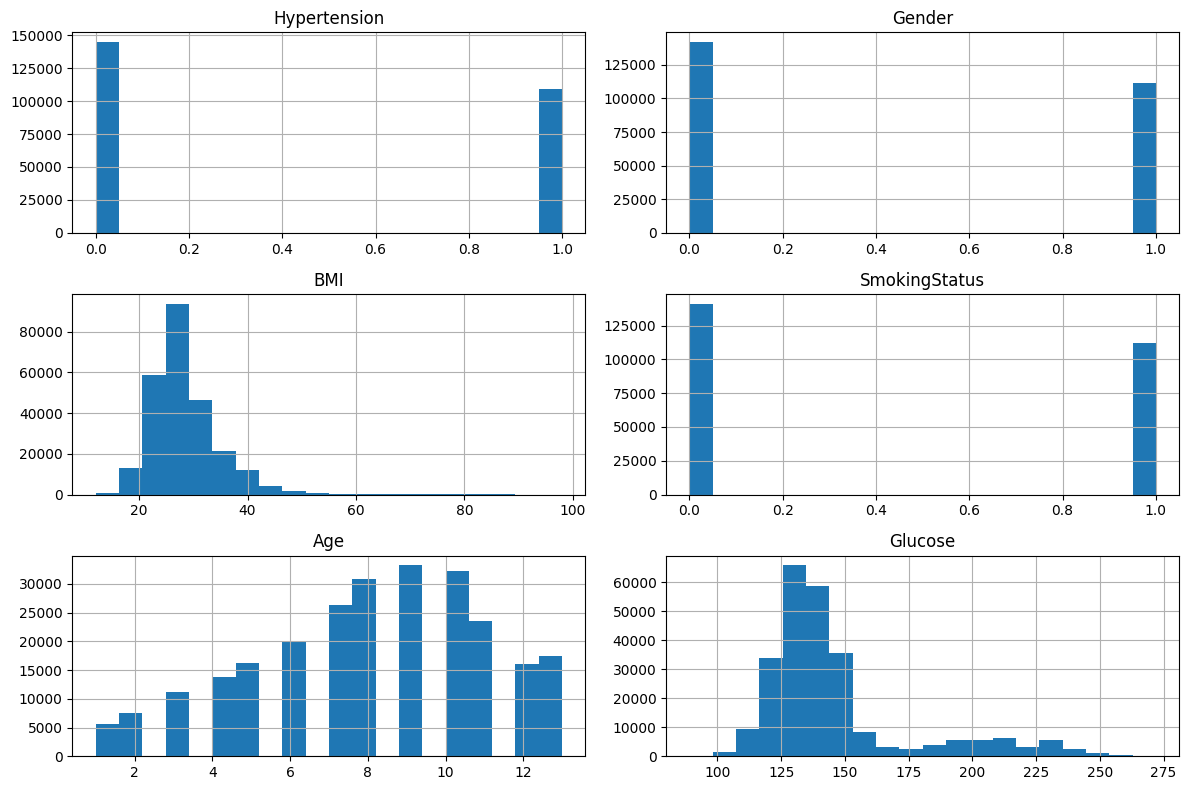

In [659]:
X.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Penanganan Nilai Hilang, Encoding, dan Scaling Menggunakan Pipeline

In [660]:
# Penanganan Nilai Hilang, Encoding, dan Scaling Menggunakan Pipeline ---

# Identifikasi kolom kategorikal dan numerik
categorical_features = X.select_dtypes(include=['object', 'bool']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Buat pipeline preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [661]:
# Pemisahan Data Latih dan Uji ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nBentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)


Bentuk X_train: (202944, 6)
Bentuk X_test: (50736, 6)
Bentuk y_train: (202944, 3)
Bentuk y_test: (50736, 3)


# Pembangunan Model Multi-output Classification

## RandomForest

In [662]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
# Menggunakan RandomForestClassifier sebagai base estimator
# MultiOutputClassifier akan melatih satu classifier untuk setiap target
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))])

# Atau menggunakan GradientBoostingClassifier
# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('classifier', MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42)))])


In [663]:
print("\nMemulai pelatihan model...")
model.fit(X_train, y_train)
print("Pelatihan model selesai.")


Memulai pelatihan model...
Pelatihan model selesai.


In [664]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test) # Untuk ROC AUC

# Mengubah y_pred_proba menjadi format yang dapat digunakan oleh roc_auc_score
# predict_proba mengembalikan daftar array untuk setiap target
# Misalnya: [array([[0.9, 0.1], ...]), array([[0.8, 0.2], ...]), ...]
# Kita perlu mengambil probabilitas kelas positif (indeks 1) untuk setiap target
y_pred_proba_formatted = np.array([pred[:, 1] for pred in y_pred_proba]).T


### Evaluasi Model

In [665]:
print("\n--- Evaluasi Model ---")

# Akurasi per target
for i, target in enumerate(target_columns):
    print(f"\nEvaluasi untuk {target}:")
    print(f"Akurasi: {accuracy_score(y_test.iloc[:, i], y_pred[:, i]):.4f}")
    print(f"Laporan Klasifikasi:\n{classification_report(y_test.iloc[:, i], y_pred[:, i])}")
    try:
        # ROC AUC hanya untuk kelas biner
        if len(y_test.iloc[:, i].unique()) == 2:
            roc_auc = roc_auc_score(y_test.iloc[:, i], y_pred_proba_formatted[:, i])
            print(f"ROC AUC: {roc_auc:.4f}")
        else:
            print("ROC AUC tidak berlaku untuk target non-biner.")
    except ValueError as e:
        print(f"Tidak dapat menghitung ROC AUC untuk {target}: {e}")

# Evaluasi keseluruhan (misalnya, rerata metrik)
# Ini bisa lebih kompleks dan tergantung pada bagaimana Anda ingin menimbang setiap target
print("\n--- Evaluasi Keseluruhan (Rata-rata Makro) ---")
# Misalnya, F1-score rata-rata makro
f1_macro = np.mean([f1_score(y_test.iloc[:, i], y_pred[:, i], average='macro') for i in range(len(target_columns))])
print(f"Rata-rata F1-score (Makro): {f1_macro:.4f}")


--- Evaluasi Model ---

Evaluasi untuk HeartDisease:
Akurasi: 0.9935
Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     45958
         1.0       0.99      0.94      0.96      4778

    accuracy                           0.99     50736
   macro avg       0.99      0.97      0.98     50736
weighted avg       0.99      0.99      0.99     50736

ROC AUC: 0.9993

Evaluasi untuk Stroke:
Akurasi: 0.9572
Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     48678
         1.0       0.17      0.01      0.03      2058

    accuracy                           0.96     50736
   macro avg       0.57      0.51      0.50     50736
weighted avg       0.93      0.96      0.94     50736

ROC AUC: 0.6927

Evaluasi untuk Diabetes:
Akurasi: 0.9999
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00 

In [ ]:
# Visualisasi (Opsional)
# Contoh: Heatmap matriks korelasi fitur
# sns.heatmap(combined_df[numerical_features].corr(), annot=True, cmap='coolwarm')
# plt.title('Korelasi Fitur Numerik')
# plt.show()

# Contoh: Distribusi fitur tertentu berdasarkan kelas target
# sns.boxplot(x='heart_disease', y='age', data=combined_df)
# plt.title('Usia berdasarkan Penyakit Jantung')
# plt.show()

### Inferences

In [ ]:
# --- 10. Prediksi untuk Data Baru (Contoh) ---
print("\n--- Contoh Prediksi Data Baru ---")

# Buat contoh data baru dengan struktur kolom yang sama seperti X_train
# Nilai-nilai ini HANYA CONTOH. Anda harus menggantinya dengan data nyata.
new_data = pd.DataFrame([{
    'age': 55,
    'sex': 'Female',
    'bmi': 28.5,
    'smoking_history': 'never smoked',
    'hypertension': 0,
    'heart_disease': 0, # Ini akan diabaikan sebagai fitur, tetapi penting untuk struktur dataframe
    'stroke': 0,       # Ini akan diabaikan sebagai fitur
    'diabetes': 0,     # Ini akan diabaikan sebagai fitur
    'cholesterol': 200,
    'blood_glucose_level': 100,
    'physactivity': 1,
    'fruits': 1,
    'veggies': 1,
    'hvyalcoholconsump': 0,
    'anyhealthcare': 1,
    'nodocbccare': 0,
    'genhlth': 3, # Skala 1-5 (1=Excellent, 5=Poor)
    'menthlth': 0, # Jumlah hari mental health buruk
    'physhlth': 0, # Jumlah hari fisik health buruk
    'diffwalk': 0, # Sulit jalan
    'race': 'White',
    'ever_married': 'Yes',
    'work_type': 'Private',
    'residence_type': 'Urban',
    'avg_glucose_level': 100,
    'cholesterol_high': 0 # Contoh fitur lain yang mungkin ada dari dataset lain
}], columns=features_columns) # Pastikan kolom sesuai dengan X_train

# Lakukan prediksi
risk_predictions = model.predict(new_data)
risk_probabilities = model.predict_proba(new_data)

print("\nPrediksi Risiko:")
for i, target in enumerate(target_columns):
    print(f"Risiko {target}: {'Tinggi' if risk_predictions[0, i] == 1 else 'Rendah'} "
          f"(Probabilitas: {risk_probabilities[i][0, 1]:.4f})") # Probabilitas kelas positif


# Pembangunan Model Multi-output Neural Network

## MNN 1

In [670]:
# Arsitektur Input
inputs = Input(shape=(X_train.shape[1],))

# Hidden layers
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)

# Output for each disease
output_diabetes = Dense(1, activation='sigmoid', name='diabetes')(x)
output_heart = Dense(1, activation='sigmoid', name='heart_disease')(x)
output_stroke = Dense(1, activation='sigmoid', name='stroke')(x)

# Build model
model = Model(inputs=inputs, outputs=[output_diabetes, output_heart, output_stroke])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', 'accuracy', 'accuracy']) # Simplified metrics to a list
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │        448 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │      2,080 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Diabetes (Dense)    │ (None, 1)         │         33 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HeartDisease        │ (None, 1)         │         33 │ dense_12[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Stroke (Dense)      │ (None, 1)         │         33 │ dense_12[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,627 (10.26 KB)

 Trainable params: 2,627 (10.26 KB)

 Non-trainable params: 0 (0.00 B)

In [671]:
y_train

,HeartDisease,Stroke,Diabetes
136300,0.0,0.0,0
131192,0.0,0.0,0
165257,0.0,0.0,0
64231,0.0,1.0,0
203158,1.0,0.0,1
...,...,...,...
189885,0.0,0.0,0
93333,0.0,0.0,0
9338,0.0,0.0,0
208546,0.0,0.0,0


In [672]:
X_train

,Hypertension,Gender,BMI,SmokingStatus,Age,Glucose
136300,0.0,0.0,34.0,1.0,5.0,150
131192,0.0,1.0,29.0,0.0,6.0,128
165257,0.0,0.0,27.0,1.0,2.0,147
64231,1.0,1.0,29.0,0.0,11.0,122
203158,1.0,1.0,37.0,0.0,3.0,195
...,...,...,...,...,...,...
189885,0.0,1.0,30.0,1.0,8.0,132
93333,1.0,1.0,27.0,1.0,9.0,137
9338,0.0,0.0,27.0,1.0,8.0,125
208546,0.0,1.0,27.0,1.0,9.0,144


In [673]:
history = model.fit(X_train,
                    [y_train['Diabetes'], y_train['HeartDisease'], y_train['Stroke']],
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32)


Epoch 1/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - Diabetes_accuracy: 0.9100 - Diabetes_loss: 0.2657 - HeartDisease_accuracy: 0.9035 - HeartDisease_loss: 0.3191 - Stroke_accuracy: 0.9508 - Stroke_loss: 0.2531 - loss: 0.8379 - val_Diabetes_accuracy: 0.9864 - val_Diabetes_loss: 0.0505 - val_HeartDisease_accuracy: 0.9084 - val_HeartDisease_loss: 0.2524 - val_Stroke_accuracy: 0.9601 - val_Stroke_loss: 0.1543 - val_loss: 0.4573
Epoch 2/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - Diabetes_accuracy: 0.9828 - Diabetes_loss: 0.0543 - HeartDisease_accuracy: 0.9058 - HeartDisease_loss: 0.2647 - Stroke_accuracy: 0.9585 - Stroke_loss: 0.1636 - loss: 0.4827 - val_Diabetes_accuracy: 0.9916 - val_Diabetes_loss: 0.0265 - val_HeartDisease_accuracy: 0.9118 - val_HeartDisease_loss: 0.2455 - val_Stroke_accuracy: 0.9601 - val_Stroke_loss: 0.1550 - val_loss: 0.4271
Epoch 3/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - Diabetes_accuracy: 0.9873 - Diabetes_loss: 0.0367 - HeartDisease_accuracy: 0.

In [675]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.33.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [676]:
import pickle
import tensorflowjs as tfjs

In [682]:
# Simpan model format SavedModel
model.export("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn1")

# Simpan model format HDF5
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn1.h5")

# Simpan model format Keras
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn1.keras")

# Simpan model format TFLite
converter1 = tf.lite.TFLiteConverter.from_saved_model("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn1")
tflite_model1 = converter1.convert()
with open("/content/drive/My Drive/Capstone LaskarAI/mnn1.tflite", "wb") as f:
    f.write(tflite_model1)

# Simpan History Model
with open("/content/drive/My Drive/Capstone LaskarAI/mnn1.pkl", "wb") as f:
    pickle.dump(history.history, f)

# Simpan model format tensorflow.js
tfjs1_path = "/content/drive/My Drive/Capstone LaskarAI/tfjs_model/mnn1"
tfjs.converters.save_keras_model(model, tfjs1_path)
print("TensorFlow.js model saved successfully")

Saved artifact at '/content/drive/My Drive/Capstone Laskar AI/saved_model/mnn1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_28')
Output Type:
  List[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  140482446208144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482446211792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482446211216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482446212368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482446212752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482444591376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482446210832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482446212560: TensorSpec(shape=(), dtype=tf.resource, name=None

failed to lookup keras version from the file,
    this is likely a weight only file
TensorFlow.js model saved successfully


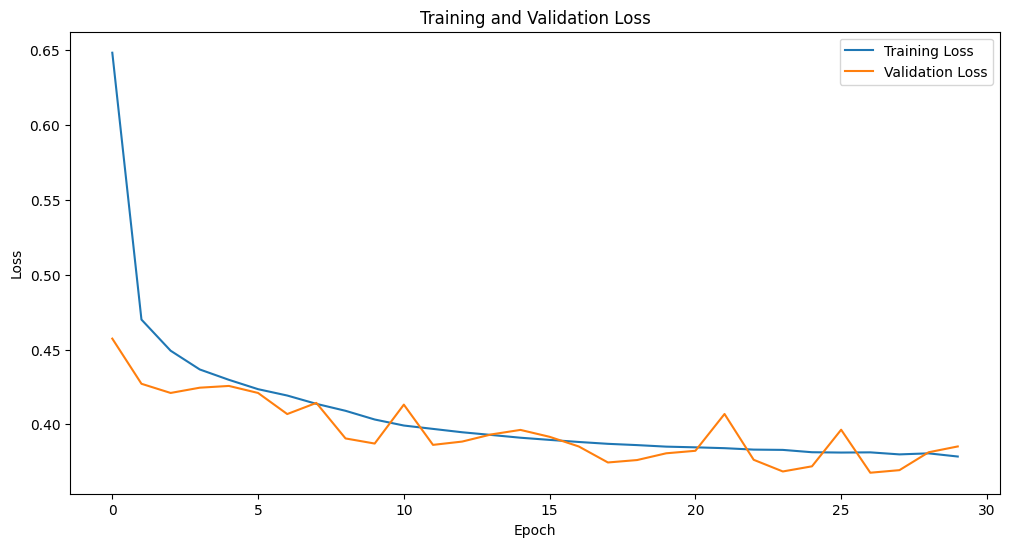

ValueError: Cannot take the length of shape with unknown rank.

In [689]:
# Plotting history (opsional)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi model pada test set
y_train_dict = {
    'heart_disease': y_train['HeartDisease'].values,
    'stroke': y_train['Stroke'].values,
    'diabetes': y_train['Diabetes'].values
}
y_test_dict = {
    'heart_disease': y_test['HeartDisease'].values,
    'stroke': y_test['Stroke'].values,
    'diabetes': y_test['Diabetes'].values
}

# Convert X_test to a NumPy array
X_test_array = X_test.values

# Evaluate the model using a list of target arrays and the NumPy array of features
# The order of target arrays should match the order of outputs in the model: Diabetes, HeartDisease, Stroke
loss, diabetes_loss, heart_loss, stroke_loss, diabetes_acc, heart_acc, stroke_acc = model.evaluate(
    X_test_array,
    [y_test_dict['diabetes'], y_test_dict['heart_disease'], y_test_dict['stroke']],
    verbose=0
)

print(f"\nTotal Test Loss: {loss:.4f}")
print("\n--- Evaluasi untuk Heart Disease ---")
print(f"Loss: {heart_loss:.4f}")
print(f"Accuracy: {heart_acc:.4f}")


print("\n--- Evaluasi untuk Stroke ---")
print(f"Loss: {stroke_loss:.4f}")
print(f"Accuracy: {stroke_acc:.4f}")


print("\n--- Evaluasi untuk Diabetes ---")
print(f"Loss: {diabetes_loss:.4f}")
print(f"Accuracy: {diabetes_acc:.4f}")

# ROC AUC can be calculated separately if needed
# For calculating AUC, you would typically predict probabilities and then use sklearn's roc_auc_score
# y_pred_prob = model.predict(X_test_array) # Use the NumPy array for prediction as well
# heart_auc = roc_auc_score(y_test['HeartDisease'].values, y_pred_prob[1]) # Index 1 for Heart Disease output
# stroke_auc = roc_auc_score(y_test['Stroke'].values, y_pred_prob[2]) # Index 2 for Stroke output
# diabetes_auc = roc_auc_score(y_test['Diabetes'].values, y_pred_prob[0]) # Index 0 for Diabetes output

# print(f"Heart Disease AUC: {heart_auc:.4f}")
# print(f"Stroke AUC: {stroke_auc:.4f}")
# print(f"Diabetes AUC: {diabetes_auc:.4f}")

## MNN 2

In [690]:
# Tentukan jumlah input (fitur)
input_shape = X_train.shape[1]

# Tentukan jumlah output untuk setiap penyakit
num_output_heart = 1 # Klasifikasi biner (0/1)
num_output_stroke = 1 # Klasifikasi biner (0/1)
num_output_diabetes = 1 # Klasifikasi biner (0/1)

# Bangun model Multi-output Neural Network
def build_multi_output_model(input_shape):
    input_layer = keras.Input(shape=(input_shape,), name='input_features')

    # Shared Hidden Layers
    shared_dense_1 = layers.Dense(128, activation='relu')(input_layer)
    shared_dropout_1 = layers.Dropout(0.3)(shared_dense_1)
    shared_dense_2 = layers.Dense(64, activation='relu')(shared_dropout_1)
    shared_dropout_2 = layers.Dropout(0.3)(shared_dense_2)

    # Output Head for Heart Disease
    heart_dense = layers.Dense(32, activation='relu')(shared_dropout_2)
    output_heart = layers.Dense(num_output_heart, activation='sigmoid', name='output_heart')(heart_dense)

    # Output Head for Stroke
    stroke_dense = layers.Dense(32, activation='relu')(shared_dropout_2)
    output_stroke = layers.Dense(num_output_stroke, activation='sigmoid', name='output_stroke')(stroke_dense)

    # Output Head for Diabetes
    diabetes_dense = layers.Dense(32, activation='relu')(shared_dropout_2)
    output_diabetes = layers.Dense(num_output_diabetes, activation='sigmoid', name='output_diabetes')(diabetes_dense)

    model = keras.Model(inputs=input_layer, outputs=[output_heart, output_stroke, output_diabetes])
    return model

model = build_multi_output_model(input_shape)

# Kompilasi model
# Gunakan BinaryCrossentropy untuk setiap output biner
# Anda bisa memberikan bobot loss jika ingin mengutamakan salah satu penyakit
model.compile(optimizer='adam',
              loss={
                  'output_heart': 'binary_crossentropy',
                  'output_stroke': 'binary_crossentropy',
                  'output_diabetes': 'binary_crossentropy'
              },
              loss_weights={
                  'output_heart': 1.0,  # Anda bisa mengatur bobot ini
                  'output_stroke': 1.0,
                  'output_diabetes': 1.0
              },
              metrics={
                  'output_heart': ['accuracy', tf.keras.metrics.AUC(name='auc')],
                  'output_stroke': ['accuracy', tf.keras.metrics.AUC(name='auc')],
                  'output_diabetes': ['accuracy', tf.keras.metrics.AUC(name='auc')]
              })

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │        896 │ input_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 32)        │      2,080 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 32)        │      2,080 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 32)        │      2,080 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_heart        │ (None, 1)         │         33 │ dense_15[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_stroke       │ (None, 1)         │         33 │ dense_16[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_diabetes     │ (None, 1)         │         33 │ dense_17[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,491 (60.51 KB)

 Trainable params: 15,491 (60.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - loss: 1.0893 - output_diabetes_accuracy: 0.8699 - output_diabetes_auc: 0.7465 - output_diabetes_loss: 0.4122 - output_heart_accuracy: 0.8937 - output_heart_auc: 0.5326 - output_heart_loss: 0.4393 - output_stroke_accuracy: 0.9547 - output_stroke_auc: 0.5041 - output_stroke_loss: 0.2378 - val_loss: 0.6208 - val_output_diabetes_accuracy: 0.9106 - val_output_diabetes_auc: 0.9963 - val_output_diabetes_loss: 0.1920 - val_output_heart_accuracy: 0.9058 - val_output_heart_auc: 0.7917 - val_output_heart_loss: 0.2654 - val_output_stroke_accuracy: 0.9594 - val_output_stroke_auc: 0.7114 - val_output_stroke_loss: 0.1636
Epoch 2/100
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - loss: 0.5088 - output_diabetes_accuracy: 0.9715 - output_diabetes_auc: 0.9888 - output_diabetes_loss: 0.0821 - output_heart_accuracy: 0.9054 - output_heart_auc: 0.7847 - output_heart_loss: 0.2652 - output_stroke_accuracy: 0.9593 - output_stroke_auc: 0.6959 - output_stro

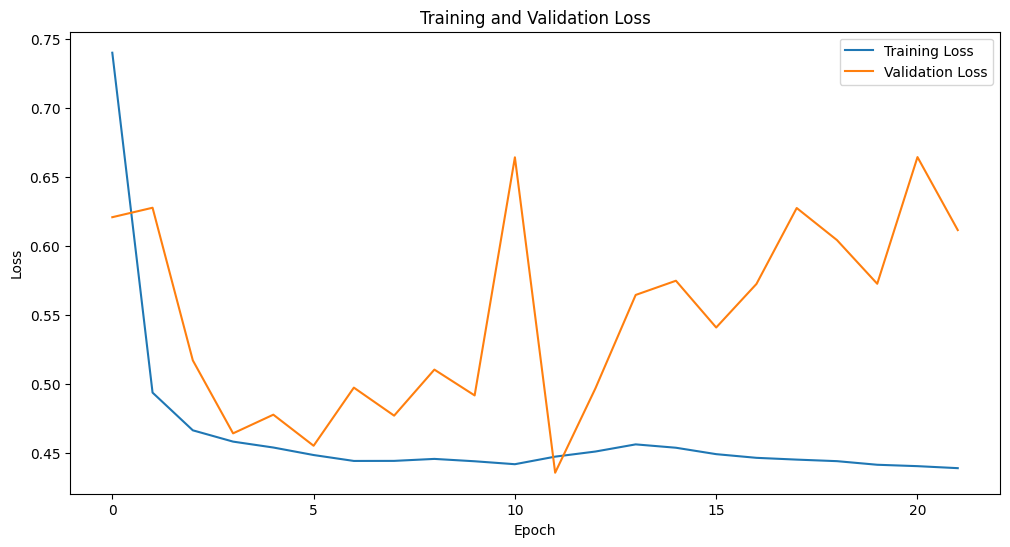


Total Test Loss: 0.4355

--- Evaluasi untuk Heart Disease ---
Loss: 0.2344
Accuracy: 0.9826
AUC: 0.9988

--- Evaluasi untuk Stroke ---
Loss: 0.1556
Accuracy: 0.9171
AUC: 0.8520

--- Evaluasi untuk Diabetes ---
Loss: 0.0457
Accuracy: 0.9594
AUC: 0.7381


In [691]:
# Karena y_train memiliki NaN untuk target yang tidak ada, Keras secara default akan mengabaikan
# sampel tersebut untuk loss tertentu jika targetnya NaN.

# Siapkan target dalam format yang benar untuk Keras
# Pastikan kolom target di y_train dan y_test adalah numpy array
y_train_dict = {
    'output_heart': y_train['HeartDisease'].values,
    'output_stroke': y_train['Stroke'].values,
    'output_diabetes': y_train['Diabetes'].values
}
y_test_dict = {
    'output_heart': y_test['HeartDisease'].values,
    'output_stroke': y_test['Stroke'].values,
    'output_diabetes': y_test['Diabetes'].values
}

# Callback untuk Early Stopping dan Model Checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_multi_output_model.keras', save_best_only=True, monitor='val_loss', mode='min')
]

history = model.fit(
    X_train, y_train_dict,
    epochs=100, # Sesuaikan jumlah epoch
    batch_size=32,
    validation_data=(X_test, y_test_dict),
    callbacks=callbacks
)

# Plotting history (opsional)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi model pada test set
loss, heart_loss, stroke_loss, diabetes_loss, heart_acc, heart_auc, stroke_acc, stroke_auc, diabetes_acc, diabetes_auc = model.evaluate(X_test, y_test_dict, verbose=0)

print(f"\nTotal Test Loss: {loss:.4f}")
print("\n--- Evaluasi untuk Heart Disease ---")
print(f"Loss: {heart_loss:.4f}")
print(f"Accuracy: {heart_acc:.4f}")
print(f"AUC: {heart_auc:.4f}")

print("\n--- Evaluasi untuk Stroke ---")
print(f"Loss: {stroke_loss:.4f}")
print(f"Accuracy: {stroke_acc:.4f}")
print(f"AUC: {stroke_auc:.4f}")

print("\n--- Evaluasi untuk Diabetes ---")
print(f"Loss: {diabetes_loss:.4f}")
print(f"Accuracy: {diabetes_acc:.4f}")
print(f"AUC: {diabetes_auc:.4f}")

In [692]:
# Simpan model format SavedModel
model.export("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn2")

# Simpan model format HDF5
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn2.h5")

# Simpan model format Keras
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn2.keras")

# Simpan model format TFLite
converter2 = tf.lite.TFLiteConverter.from_saved_model("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn2")
tflite_model2 = converter2.convert()
with open("/content/drive/My Drive/Capstone LaskarAI/mnn2.tflite", "wb") as f:
    f.write(tflite_model2)

# Simpan History Model
with open("/content/drive/My Drive/Capstone LaskarAI/mnn2.pkl", "wb") as f:
    pickle.dump(history.history, f)

# Simpan model format tensorflow.js
tfjs1_path = "/content/drive/My Drive/Capstone LaskarAI/tfjs_model/mnn2"
tfjs.converters.save_keras_model(model, tfjs1_path)
print("TensorFlow.js model saved successfully")

Saved artifact at '/content/drive/My Drive/Capstone Laskar AI/saved_model/mnn2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='input_features')
Output Type:
  List[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  140482444396688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482444398224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482444397456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482444399376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482444402256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482444403600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482444400720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140482444402064: TensorSpec(shape=(), dtype=tf.resource, name=None)

failed to lookup keras version from the file,
    this is likely a weight only file
TensorFlow.js model saved successfully


# Prediksi dan Interpretasi Output

In [696]:
# Lakukan prediksi pada data baru (contoh data test)
predictions = model.predict(X_test)

# Prediksi probabilitas untuk setiap penyakit
pred_heart_prob = predictions[0]
pred_stroke_prob = predictions[1]
pred_diabetes_prob = predictions[2]

# Konversi probabilitas menjadi kelas biner (risiko tinggi/rendah)
# Anda perlu menentukan threshold (misalnya 0.5)
threshold = 0.5
pred_heart_class = (pred_heart_prob > threshold).astype(int)
pred_stroke_class = (pred_stroke_prob > threshold).astype(int)
pred_diabetes_class = (pred_diabetes_prob > threshold).astype(int)

# Hitung metrik tambahan (Presisi, Recall, F1-Score, Confusion Matrix)
# Penting: Lakukan ini hanya untuk baris di mana label target tidak NaN.
# Anda perlu memfilter y_test_dict dan pred_..._class.

# Contoh untuk Heart Disease
valid_indices_heart = ~np.isnan(y_test_dict['output_heart'])
if np.sum(valid_indices_heart) > 0:
    print("\n--- Metrik Lebih Lanjut untuk Heart Disease ---")
    print(f"Precision: {precision_score(y_test_dict['output_heart'][valid_indices_heart], pred_heart_class[valid_indices_heart]):.4f}")
    print(f"Recall: {recall_score(y_test_dict['output_heart'][valid_indices_heart], pred_heart_class[valid_indices_heart]):.4f}")
    print(f"F1-Score: {f1_score(y_test_dict['output_heart'][valid_indices_heart], pred_heart_class[valid_indices_heart]):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test_dict['output_heart'][valid_indices_heart], pred_heart_class[valid_indices_heart]))

# Lakukan hal yang sama untuk Stroke dan Diabetes
# Example for Stroke
valid_indices_stroke = ~np.isnan(y_test_dict['output_stroke'])
if np.sum(valid_indices_stroke) > 0:
    print("\n--- Metrik Lebih Lanjut untuk Stroke ---")
    print(f"Precision: {precision_score(y_test_dict['output_stroke'][valid_indices_stroke], pred_stroke_class[valid_indices_stroke]):.4f}")
    print(f"Recall: {recall_score(y_test_dict['output_stroke'][valid_indices_stroke], pred_stroke_class[valid_indices_stroke]):.4f}")
    print(f"F1-Score: {f1_score(y_test_dict['output_stroke'][valid_indices_stroke], pred_stroke_class[valid_indices_stroke]):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test_dict['output_stroke'][valid_indices_stroke], pred_stroke_class[valid_indices_stroke]))

# Example for Diabetes
valid_indices_diabetes = ~np.isnan(y_test_dict['output_diabetes'])
if np.sum(valid_indices_diabetes) > 0:
    print("\n--- Metrik Lebih Lanjut untuk Diabetes ---")
    print(f"Precision: {precision_score(y_test_dict['output_diabetes'][valid_indices_diabetes], pred_diabetes_class[valid_indices_diabetes]):.4f}")
    print(f"Recall: {recall_score(y_test_dict['output_diabetes'][valid_indices_diabetes], pred_diabetes_class[valid_indices_diabetes]):.4f}")
    print(f"F1-Score: {f1_score(y_test_dict['output_diabetes'][valid_indices_diabetes], pred_diabetes_class[valid_indices_diabetes]):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test_dict['output_diabetes'][valid_indices_diabetes], pred_diabetes_class[valid_indices_diabetes]))


# Contoh interpretasi untuk satu individu (misalkan individu pertama di test set)
sample_index = 0
print(f"\n--- Prediksi untuk Sampel Individu ke-{sample_index} ---")
print(f"Fitur Input (Processed): {X_test.iloc[sample_index].values[:5]}...") # Use .iloc to access by integer index
print(f"Label Aktual Heart Disease: {y_test_dict['output_heart'][sample_index]}")
print(f"Prediksi Probabilitas Heart Disease: {pred_heart_prob[sample_index][0]:.4f}")
print(f"Prediksi Kelas Heart Disease: {'Risiko Tinggi' if pred_heart_class[sample_index][0] == 1 else 'Risiko Rendah'}")

print(f"Label Aktual Stroke: {y_test_dict['output_stroke'][sample_index]}")
print(f"Prediksi Probabilitas Stroke: {pred_stroke_prob[sample_index][0]:.4f}")
print(f"Prediksi Kelas Stroke: {'Risiko Tinggi' if pred_stroke_class[sample_index][0] == 1 else 'Risiko Rendah'}")

print(f"Label Aktual Diabetes: {y_test_dict['output_diabetes'][sample_index]}")
print(f"Prediksi Probabilitas Diabetes: {pred_diabetes_prob[sample_index][0]:.4f}")
print(f"Prediksi Kelas Diabetes: {'Risiko Tinggi' if pred_diabetes_class[sample_index][0] == 1 else 'Risiko Rendah'}")

# Untuk interpretasi faktor pendorong risiko, Anda perlu menggunakan library seperti SHAP
# Ini akan menjadi langkah analisis terpisah setelah model dilatih.
# import shap
# explainer = shap.DeepExplainer(model, X_train_sample_for_shap) # Butuh sample data untuk DeepExplainer
# shap_values = explainer.shap_values(X_test_sample) # Pilih sample dari X_test untuk diinterpretasi
# shap.summary_plot(shap_values[0], X_test_sample, feature_names=feature_names, plot_type="bar", show=False)
# plt.title('SHAP Values for Heart Disease Prediction')
# plt.show()
# # Lakukan ini untuk setiap output head

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

--- Metrik Lebih Lanjut untuk Heart Disease ---
Precision: 0.9441
Recall: 0.1272
F1-Score: 0.2243
Confusion Matrix:
 [[45922    36]
 [ 4170   608]]

--- Metrik Lebih Lanjut untuk Stroke ---
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
 [[48678     0]
 [ 2058     0]]

--- Metrik Lebih Lanjut untuk Diabetes ---
Precision: 1.0000
Recall: 0.8898
F1-Score: 0.9417
Confusion Matrix:
 [[42741     0]
 [  881  7114]]

--- Prediksi untuk Sampel Individu ke-0 ---
Fitur Input (Processed): [ 0.  1. 27.  1.  8.]...
Label Aktual Heart Disease: 0.0
Prediksi Probabilitas Heart Disease: 0.0382
Prediksi Kelas Heart Disease: Risiko Rendah
Label Aktual Stroke: 0.0
Prediksi Probabilitas Stroke: 0.0265
Prediksi Kelas Stroke: Risiko Rendah
Label Aktual Diabetes: 0
Prediksi Probabilitas Diabetes: 0.0019
Prediksi Kelas Diabetes: Risiko Rendah


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
